In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('results.csv')

In [ ]:
data.sort_values('dev_f1', ascending=False)

In [ ]:
import json
from pprint import pprint
pprint(json.loads(data.loc[177]['model_params'].replace("'", '"')))

In [ ]:
# hp analysis
from pprint import pprint
import json
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])
for name, group in grouped:
    print(name)
    best_idx = group['dev_f1'].idxmax()
    pprint(json.loads(group['model_params'].loc[best_idx].replace("'", '"')))
    print(group.loc[best_idx])
    print('   ')

In [ ]:
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])

In [ ]:
stats = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name', 'added_gold']).aggregate(['mean', 'median', 'std', 'count'])

In [ ]:
distant_data = data[data['distant'] == 'with_distant']
normal_data = data[data['distant'] == 'without_distant']
bond_data = data[data['model_name'] == 'bond']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=distant_data, x='added_gold', y='corr_f1', hue='model_name')
plt.savefig('experiments/plots/distant_f1.png', dpi=1200)

In [ ]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_precision', hue='model_name')
plt.savefig('experiments/plots/distant_precision.png', dpi=1200)

In [ ]:
sns.lineplot(data=distant_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/distant_recall.png', dpi=1200)

In [ ]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_f1', hue='model_name')
plt.savefig('experiments/plots/normal_f1.png', dpi=1200)

In [ ]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_precision', hue='model_name')
plt.savefig('experiments/plots/normal_precision.png', dpi=1200)

In [ ]:
sns.lineplot(data=normal_data, x='added_gold', y='corr_recall', hue='model_name')
plt.savefig('experiments/plots/normal_recall.png', dpi=1200)

In [ ]:
bond_data = bond_data.rename(columns={'distant': 'markup'})
dynet = pd.read_csv('dynet_results.csv')
dynet.columns = ['added_gold', 'test_f1', 'test_precision', 'test_recall']
for val_col in ['test_f1', 'test_precision', 'test_recall']:
    dynet[val_col] /= 100
dynet['markup'] = 'base_estimation'

In [ ]:
bond_data = pd.concat([bond_data, dynet], ignore_index=True)
bond_data

In [ ]:
sns.lineplot(data=bond_data, x='added_gold', y='test_f1', hue='markup')
plt.savefig('experiments/plots/bond_f1.png', dpi=1200)

In [ ]:
sns.lineplot(data=bond_data, x='added_gold', y='test_precision', hue='markup')
plt.savefig('experiments/plots/bond_precision.png', dpi=1200)

In [ ]:
sns.lineplot(data=bond_data, x='added_gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

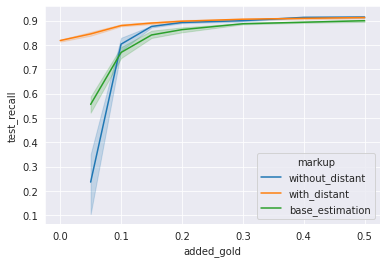

In [220]:
sns.lineplot(data=bond_data, x='added_gold', y='test_recall', hue='markup')
plt.savefig('experiments/plots/bond_recall.png', dpi=1200)

In [78]:
grouped.groups

{('None', 'bond'): [10, 11, 12, 13, 14, 15, 16, 17, 67, 70, 71, 72, 73, 74, 75, 76, 79, 80, 82, 83, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162], ('None', 'coregularized'): [46, 47, 48, 49, 50, 51, 52, 53, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], ('None', 'supervised'): [38, 39, 40, 41, 42, 43, 44, 45, 106, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120], ('distant', 'bond'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], ('distant', 'coregularized'): [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 110, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190], ('distant', 'supervised'): [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 77, 78, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 1